In [4]:
import ast
import re
def extract_from_line(line):
    start = line.find('(')
    end = line.rfind(')')
    epoch_match = re.search(r'Epoch\s+(\d+)', line)
    if not epoch_match:
        return None
    epoch = int(epoch_match.group(1))
    
    if start == -1 or end == -1:
        return None

    tuple_str = line[start:end+1]
    try:
        data = ast.literal_eval(tuple_str)
        return epoch, data
    except:
        return None

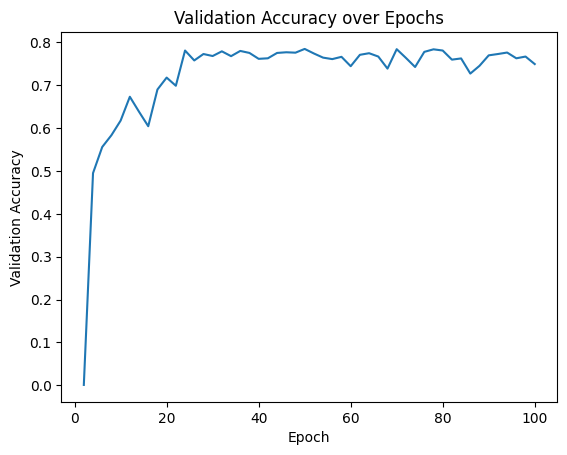

In [5]:
file_name = "checkpoints/val_log.txt"

graph_data = []
x_axis = []
with open(file_name, "r") as f:
    lines = f.readlines()
    for line in lines:

        epoch, tuple_data = extract_from_line(line)
        if tuple_data is not None:
            graph_data.append(tuple_data[0])
            x_axis.append(epoch)


import matplotlib.pyplot as plt

plt.plot(x_axis, graph_data)
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.savefig(file_name + '.png')
plt.show()